In [ ]:
from google.colab import files

In [ ]:
files.upload();

Saving set_3196.csv to set_3196.csv
Saving set_11735.csv to set_11735.csv
Saving set_19890.csv to set_19890.csv
Saving set_41104.csv to set_41104.csv
Saving set_48736.csv to set_48736.csv
Saving set_55454.csv to set_55454.csv
Saving set_57884.csv to set_57884.csv
Saving set_80488.csv to set_80488.csv
Saving set_84024.csv to set_84024.csv
Saving set_87073.csv to set_87073.csv
Saving set_91228.csv to set_91228.csv
Saving set_92188.csv to set_92188.csv
Saving set_26465.csv to set_26465.csv
Saving set_32114.csv to set_32114.csv
Saving set_32478.csv to set_32478.csv
Saving set_38945.csv to set_38945.csv
Saving set_50463.csv to set_50463.csv
Saving set_56354.csv to set_56354.csv
Saving set_57241.csv to set_57241.csv
Saving set_59620.csv to set_59620.csv
Saving set_68439.csv to set_68439.csv
Saving set_74840.csv to set_74840.csv
Saving set_76367.csv to set_76367.csv
Saving set_84805.csv to set_84805.csv
Saving set_84815.csv to set_84815.csv
Saving set_90029.csv to set_90029.csv


In [ ]:
! mkdir DataSet
! mv *.csv DataSet

In [ ]:
! ls DataSet/

set_11735.csv  set_38945.csv  set_57241.csv  set_80488.csv  set_91228.csv
set_19890.csv  set_41104.csv  set_57884.csv  set_84024.csv  set_92188.csv
set_26465.csv  set_48736.csv  set_59620.csv  set_84805.csv
set_3196.csv   set_50463.csv  set_68439.csv  set_84815.csv
set_32114.csv  set_55454.csv  set_74840.csv  set_87073.csv
set_32478.csv  set_56354.csv  set_76367.csv  set_90029.csv


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
sns.set_style('darkgrid')

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU is", "available ✅" if tf.config.list_physical_devices('GPU') else "NOT available ❌")


TensorFlow version: 2.18.0
GPU is available ✅


In [ ]:
import os
import pandas as pd

PATH = os.path.join(".","DataSet")
FILES = os.listdir(PATH)

for i, f_name in enumerate(FILES):
  print(f_name)
  df_0 = pd.read_csv(os.path.join(PATH,f_name),index_col = 0 )
  if i == 0:
    df_ = df_0
  else:
    df_ = pd.concat((df_,df_0), axis = 0)

display(df_.shape)
display(df_.head())

set_55454.csv
set_38945.csv
set_50463.csv
set_57884.csv
set_80488.csv
set_32478.csv
set_3196.csv
set_26465.csv
set_57241.csv
set_59620.csv
set_84805.csv
set_90029.csv
set_56354.csv
set_92188.csv
set_19890.csv
set_84815.csv
set_84024.csv
set_76367.csv
set_32114.csv
set_48736.csv
set_87073.csv
set_91228.csv
set_68439.csv
set_41104.csv
set_74840.csv
set_11735.csv


(24300, 5)

,th1,th2,th3,gamma,C_plus
0,1.904103,-4.441673,5.638950,0.972541,4.000000e+00
1,5.702624,-2.952670,2.641208,1.590033,-5.300924e-17
2,1.725298,-2.038640,-1.660128,1.274009,4.000000e+00
3,1.373864,2.227183,-5.377841,1.981661,4.000000e+00
4,5.547075,-2.103897,1.134864,0.693321,1.413580e-16


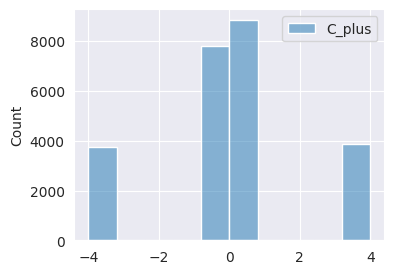

In [ ]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(1,1,1)

sns.histplot(df_[['C_plus']], bins = 10, ax = ax)
plt.show()


In [ ]:
def config_ax(ax):
  ax.set_xticks([- 2 * np.pi + i * 4 * np.pi /4 for i in range(5)])
  ax.set_xticklabels([r"$-2\pi$", r"$-\pi$", r"$0$", r"$\pi$", r"$2\pi$"])
  ax.set_yticks([- 2 * np.pi + i * 4 * np.pi /4 for i in range(5)])
  ax.set_yticklabels([r"$-2\pi$", r"$-\pi$", r"$0$", r"$\pi$", r"$2\pi$"])

  ax.set_xlabel(r"$\theta_{2}$")
  ax.set_ylabel(r"$\theta_{1}$")
  ax.grid(False)

In [ ]:
X_data = df_[['th1','th2','th3','gamma']].to_numpy()
y_data = df_[['C_plus']].to_numpy().flatten()

#y_data = np.round(y_data) + 4

y_data[(y_data > -2) * (y_data < 2)] = 0
y_data[y_data <= -2] = 1
y_data[y_data >= 2] = 2
print(np.unique(y_data))


[0. 1. 2.]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_tt, y_train, y_tt = train_test_split(X_data,y_data, shuffle = True, test_size = 0.7)
X_test, X_valid, y_test, y_valid = train_test_split(X_tt,y_tt, shuffle = True, test_size = 0.5)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model_2 = keras.Sequential([
    layers.Input([4]),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1024, activation='relu'),
    layers.Dense(3, activation='softmax')
])


In [ ]:
model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

history = model_2.fit(
    X_train,
    y_train,
    validation_data = (X_valid,y_valid),
    batch_size = 512,
    epochs = 200,
    verbose  = 1,
    callbacks=[early_stop]
    )

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.6561 - loss: 1.0068 - val_accuracy: 0.6762 - val_loss: 0.8642
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6858 - loss: 0.8458 - val_accuracy: 0.6762 - val_loss: 0.8199
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6849 - loss: 0.8008 - val_accuracy: 0.6747 - val_loss: 0.7661
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6811 - loss: 0.7541 - val_accuracy: 0.6432 - val_loss: 0.7525
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6766 - loss: 0.7366 - val_accuracy: 0.6641 - val_loss: 0.7368
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6777 - loss: 0.7347 - val_accuracy: 0.6762 - val_loss: 0.7165
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6740 - loss: 0.7164 - val_accuracy: 0.6762 - val_loss: 0.7020
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6878 - loss: 0.6911 - val_accuracy: 0

Best Validation Loss: 0.3388
Best Validation Accuracy: 0.8475


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

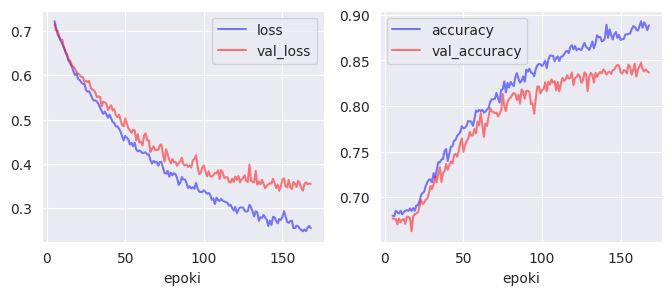

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
fig = plt.figure(figsize = (8,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_xlabel("epoki")
ax2.set_xlabel("epoki")

history_df.loc[5:, ['loss', 'val_loss']].plot(ax = ax1, color = ["blue","red"], alpha = 0.5, label = ["funckja straty: dane treningowe","funckja straty: dane testowe" ])
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot(ax = ax2, color = ["blue","red"], alpha = 0.5)

print(("Best Validation Loss: {:0.4f}" +
      "\nBest Validation Accuracy: {:0.4f}")
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))

fig.savefig("Loss_chern.pdf", format = "pdf", bbox_inches = "tight")
files.download("Loss_chern.pdf")

In [ ]:

def predict(model, th1, th2, del_):
  # th2 = th3
  th_plus_m , th_minus_m = np.meshgrid(th1,th2)
  n = np.prod(th_plus_m.shape)
  args_ = np.concatenate((th_plus_m.reshape(-1,1),th_minus_m.reshape(-1,1),th_plus_m.reshape(-1,1),np.full((n,1), del_)), axis = 1)
  print(args_.shape)
  pred = model.predict(args_)
  y_pred = np.argmax(pred, axis = 1)
  C_1_prob = pred[:,1]
  C_2_prob = pred[:,2]
  print(y_pred.shape)
  return th_plus_m, th_minus_m, y_pred.reshape(th_plus_m.shape), C_1_prob.reshape(th_plus_m.shape), C_2_prob.reshape(th_plus_m.shape)

(395641, 4)
12364/12364 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step
(395641,)
(395641, 4)
12364/12364 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step
(395641,)
(395641, 4)
12364/12364 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step
(395641,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

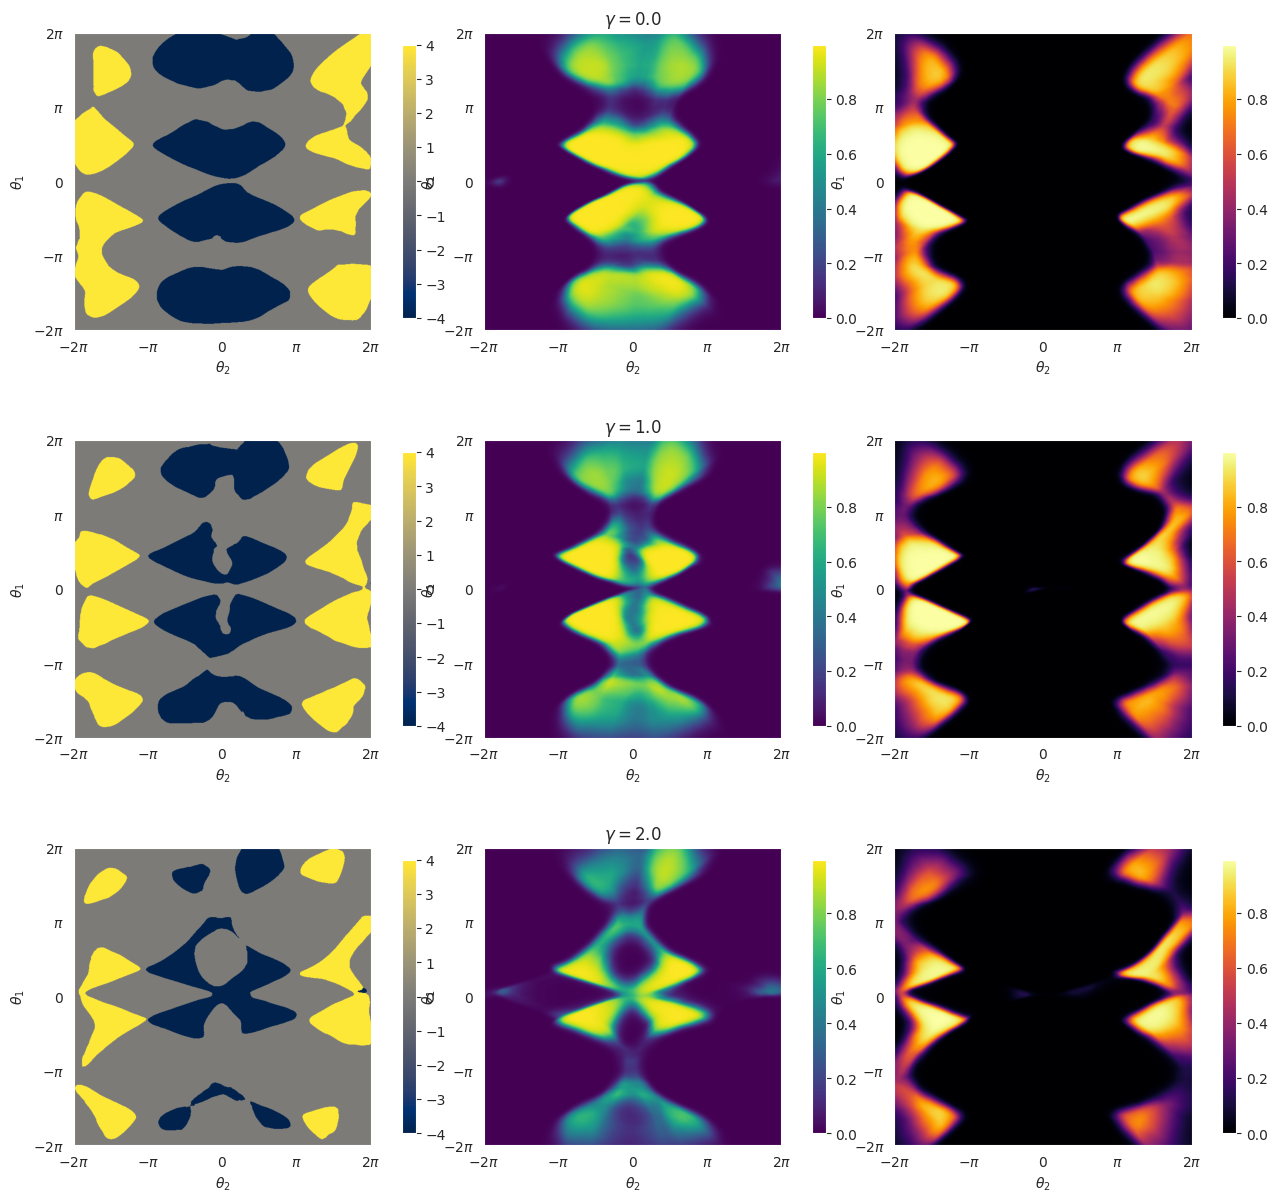

In [ ]:
th1 = np.arange(-2*np.pi, 2 *np.pi, 0.02)
th2 = th1.copy()

fig = plt.figure(figsize = (15,15))

for i,del_ in enumerate([0.,1.,2.]):

  th1_, th2_, C_, C_1_prob, C_2_prob = predict(model_2, th1,th2,del_)

  C_ = np.where(C_ == 1, -4 ,C_)
  C_ = np.where(C_ == 2, 4, C_)

  ax1 = fig.add_subplot(3,3,i * 3+1)
  cax1 = ax1.imshow(C_.T, cmap = "cividis",extent = [-2* np.pi , 2 *np.pi,-2* np.pi , 2 *np.pi ])
  fig.colorbar(cax1, ax = ax1, fraction=0.04, pad=0.09)
  config_ax(ax1)

  ax2 = fig.add_subplot(3,3,i * 3 + 2)
  cax2 = ax2.imshow(C_1_prob.T, cmap = "viridis",extent = [-2* np.pi , 2 *np.pi,-2* np.pi , 2 *np.pi ])
  fig.colorbar(cax2, ax = ax2, fraction=0.04, pad=0.09)
  config_ax(ax2)

  ax2.set_title(r"$\gamma=$" + f"{del_}")

  ax3 = fig.add_subplot(3,3, i * 3 +3)
  cax3 = ax3.imshow(C_2_prob.T, cmap = "inferno",extent = [-2* np.pi , 2 *np.pi,-2* np.pi , 2 *np.pi ])
  fig.colorbar(cax3, ax = ax3, fraction=0.04, pad=0.09)
  config_ax(ax3)

fig.savefig("ChernPredict.pdf", format = "pdf", bbox_inches = "tight")
files.download("ChernPredict.pdf")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,  confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score

model accuracy: 0.8582010582010582
model micro f1_score: 0.8582010582010582
model micro recall_score: 0.8582010582010582
model micro precision_score: 0.8582010582010582
model macro f1_score: 0.8115563416791263
model macro recall_score: 0.8142632397196613
model macro precision_score: 0.8098026205051513


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

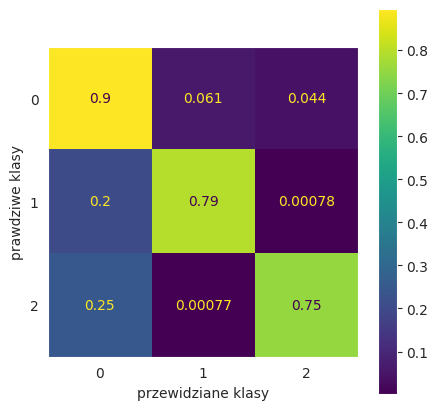

In [ ]:
y_pred_val = np.argmax(model_2(X_test), axis = 1)

print(f"model accuracy: {accuracy_score(y_test, y_pred_val)}")

print(f"model micro f1_score: {f1_score(y_test, y_pred_val, average = 'micro')}")
print(f"model micro recall_score: {recall_score(y_test, y_pred_val, average='micro')}")
print(f"model micro precision_score: {precision_score(y_test, y_pred_val, average = 'micro')}")

print(f"model macro f1_score: {f1_score(y_test, y_pred_val, average = 'macro')}")
print(f"model macro recall_score: {recall_score(y_test, y_pred_val, average='macro')}")
print(f"model macro precision_score: {precision_score(y_test, y_pred_val, average = 'macro')}")

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)

cnf_mat_2 = confusion_matrix(y_test, y_pred_val, normalize = 'true')

disp = ConfusionMatrixDisplay(cnf_mat_2)
disp.plot(ax = ax)

ax.set_ylabel("prawdziwe klasy")
ax.set_xlabel("przewidziane klasy")
ax.grid(False)

fig.savefig("ConfusionMatChern.pdf", format = "pdf", bbox_inches = "tight")
files.download("ConfusionMatChern.pdf")